# FUNCIONES

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy import signal
from scipy.signal import lfilter, firwin

In [163]:
def get_values(path, col):
  df = pd.read_csv(path, sep='\t', skiprows=3)  # saltar las dos primeras filas (encabezado)
  novena_columna = df.iloc[:, col].values
  n = [i/1000 for i in range(0, len(novena_columna))]
  signal = [(float(valor)/(2**10)-1/2)*3.3/1009*1000 for valor in novena_columna]
  return n, signal

In [164]:
def plot_values(n, y, label, ini, fin):
  plt.plot(n[ini:fin], y[ini:fin])
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mv)')
  plt.title(label)
  plt.grid(True)
  plt.show()

In [165]:
def FreqAnalysis_FFT (signal):
  global fs
  fs = 1000
  fft_result = np.fft.fft(signal)
  freqs = np.fft.fftfreq(len(signal), 1/fs)
  # Graficar la magnitud de la FFT
  plt.figure(figsize=(10, 5))
  plt.plot(freqs, np.abs(fft_result))
  plt.xlim(-600, 600)
  plt.title('Magnitud de la Transformada Rápida de Fourier (FFT)')
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Magnitud')
  plt.grid(True)
  plt.show()
  return fft_result

In [166]:
def WaveletFiltering(signal, ini, fin):
    coeffs = pywt.wavedec(signal, 'db5', level=9)
    # sigma = np.median(coeffs[-1])/0.6745
    # print(sigma)
    # thresh = sigma*np.sqrt(2*np.log10(len(signal)))
    # print(thresh)
    # Filtrar los coeficientes
    threshold = 0.2
    filtered_coeffs = [pywt.threshold(coeff, threshold, mode='hard') for coeff in coeffs]

    # Reconstruir la señal filtrada
    filtered_signal = pywt.waverec(filtered_coeffs, 'db5')
    plt.figure()
    plt.plot(signal[ini:fin], label='Señal original')
    plt.plot(filtered_signal[ini:fin], label='Señal filtrada')
    plt.title('Señal filtrada')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.ylim([-1.2, 1.2])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return filtered_signal

In [167]:
def IIR_Butter(EMGsignal, ini, fin):
  b,a = signal.butter(2, 10, 'highpass', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, EMGsignal)
  b,a = signal.butter(8, 400, 'lowpass', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  b,a = signal.butter(2, [40, 80], 'stop', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  b,a = signal.butter(2, [100, 140], 'stop', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  b,a = signal.butter(2, [160, 200], 'stop', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  b,a = signal.butter(2, [220, 260], 'stop', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  b,a = signal.butter(2, [280, 320], 'stop', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  b,a = signal.butter(2, [340, 380], 'stop', fs=1000, output='ba')
  filteredEMG =signal.filtfilt(b,a, filteredEMG)
  plt.figure()
  plt.plot(EMGsignal[ini:fin], label='Señal original')
  plt.plot(filteredEMG[ini:fin], label='Señal filtrada')
  plt.title('Señal filtrada')
  plt.xlabel('Tiempo')
  plt.ylabel('Amplitud')
  plt.ylim([-1.2, 1.2])
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()
  return filteredEMG

In [168]:
def FIR(EMGsignal, ini, fin):
  n = [i/1000 for i in range(0,len(EMGsignal))]
  t = [num / fs for num in n]; N=len(n)
  M = 37;
  Fc = 30
  wc = 2*np.pi*Fc/fs
  w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=1000, pass_zero=False)
  w = np.round(w,3)
  nm = np.arange(M)
  W = np.fft.fft(w,N)
  W = np.round(W[0:N//2],3)
  y_filtrado = lfilter(w, np.array(1),EMGsignal)
  plt.figure()
  plt.plot(n[ini: fin], EMGsignal[ini: fin], label="Señal Original")
  plt.plot(n[ini: fin], y_filtrado[ini: fin], label="Señal Filtrada")
  plt.ylabel("Amplitud (mv)")
  plt.xlabel("Tiempo (s)")
  plt.title("EMG")
  plt.legend()
  plt.grid(True)
  plt.margins(0, 0.05)
  return y_filtrado

In [169]:
def SNR(signal, filtered_signal):
    power_signal = np.mean(np.square(signal))
    noise = signal - filtered_signal
    power_noise = np.mean(np.square(noise))
    snr = 10 * np.log10(power_signal / power_noise)
    return snr

In [170]:
def ifft_plot(frequency_data):
    time_data = np.fft.ifft(frequency_data)
    real_time_data = time_data.real
    plt.plot(real_time_data)
    plt.title('Parte Real de los Datos en el Dominio del Tiempo (IFFT)')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()
    return real_time_data

In [171]:
def Periodogram(signal):
  powSpectralDensity = abs(np.fft.fft(signal))**2
  freqs = np.fft.fftfreq(len(signal), 1/fs)
  plt.plot(freqs, powSpectralDensity)
  plt.title('Power Spectral Density')
  plt.xlabel('Frecuencia')
  plt.ylabel('Potencia')
  plt.legend()
  plt.grid(True)
  plt.show()
  return

In [172]:
def split_signal(signal, N):
    num_segments = len(signal) // N  # Número de pedazos completos
    segments = [signal[i*N:(i+1)*N] for i in range(num_segments)]
    return segments

In [173]:
def wavelength(signal):
  n = [i for i in range(0, len(signal))]
  t = n/1000
  peak_indices = np.where(np.diff(np.sign(np.diff(signal))) < 0)[0]
  # Calcular la longitud de onda como la distancia entre dos picos consecutivos
  if len(peak_indices) >= 2:
      wavelength = t[peak_indices[1]] - t[peak_indices[0]]
      print("Longitud de onda:", wavelength)
  else:
      print("No se encontraron suficientes picos para calcular la longitud de onda.")

In [253]:
def timeChar(segments):
  mavlist = []
  rmslist = []
  mavslist = []
  varlist = []
  iemglist = []
  wllist = []
  zclist = []
  ssclist = []
  for EMGsignal in segments:
    mav = np.mean(np.abs(EMGsignal))
    rms = np.sqrt(np.mean(np.square(EMGsignal)))
    mavs = np.mean(np.abs(np.diff(EMGsignal)))
    var = np.var(EMGsignal)

    # Calcular el iEMG (integral de la EMG)
    iemg_value = np.sum(np.abs(EMGsignal_NoDC))
    # Calcular la longitud de la forma de onda (WL)
    wl_value = len(EMGsignal_NoDC)
    # Calcular los cruces por cero (ZC)
    zc_value = np.sum(np.diff(np.sign(EMGsignal_NoDC)) != 0)
    # Calcular los cambios en el signo de la pendiente (SSC)
    ssc_value = np.sum(np.diff(np.sign(np.diff(EMGsignal_NoDC))) != 0)
    mavlist.append(mav)
    rmslist.append(rms)
    mavslist.append(mavs)
    varlist.append(var)
    iemglist.append(iemg_value)
    wllist.append(wl_value)
    zclist.append(zc_value)
    ssclist.append(ssc_value)

    mav_mean = np.mean(mavlist)
    rms_mean = np.mean(rmslist)
    mavs_mean = np.mean(mavslist)
    var_mean = np.mean(varlist)
    iemg_mean = np.mean(iemglist)
    wl_mean = np.mean(wllist)
    zc_mean = np.mean(zclist)
    ssc_mean = np.mean(ssclist)

  print("Mean Absolute Value: ", mav_mean)
  print("Root Mean Square: ", rms_mean)
  print("Mean Absolute Value Slope: ", mavs_mean)
  print("Variance: ", var_mean);
  print("iEMG:", iemg_value)
  print("Waveform Length (WL):", wl_value)
  print("Zeros Crosses (ZC):", zc_value)
  print("Sign Signal Change (SSC):", ssc_value)

In [250]:
def freqChar(segments):
    peakFreqlist = []
    medFreqlist = []
    avgFreqlist = []

    for signal in segments:
        freqs = np.fft.fftfreq(len(signal), 1/1000)
        fft_spectrum = np.fft.fft(signal)
        magnitude_spectrum = np.abs(fft_spectrum)

        # Encontrar la frecuencia pico
        peak_freq_index = np.argmax(magnitude_spectrum)
        peakFreq = freqs[peak_freq_index]

        # Calcular frecuencias positivas
        positive_freqs = freqs[freqs >= 0]
        positive_magnitude = magnitude_spectrum[freqs >= 0]

        # Calcular promedio ponderado de magnitudes por frecuencias
        if (np.sum(positive_magnitude)==0):
          avgFreq = 0
        else:
          avgFreq = np.sum(positive_magnitude * positive_freqs) / np.sum(positive_magnitude)

        # Calcular mediana de las magnitudes del espectro de frecuencia
        medFreq = np.median(positive_magnitude)

        peakFreqlist.append(peakFreq)
        medFreqlist.append(medFreq)
        avgFreqlist.append(avgFreq)
    mPeak = np.mean(peakFreqlist)
    mMed = np.mean(medFreqlist)
    mAvg = np.mean(avgFreqlist)

    print("Peak Frequency: ", mPeak)
    print("Median Frequency: ", mMed)
    print("Mean Frequency: ", mAvg)


<ipython-input-163-22f27b2249cd>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', skiprows=3)  # saltar las dos primeras filas (encabezado)


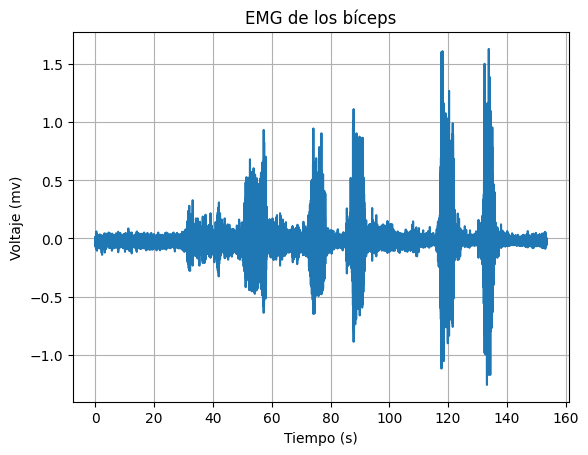

In [189]:
path = "/content/drive/MyDrive/PUCP/7mo ciclo/Instruducción a Señales Biomédicas/Laboratorios/EMG/BICEPS.txt"
[n, EMGsignal] = get_values(path, 5)
label = "EMG de los bíceps"
Ntot = len(EMGsignal)
plot_values(n, EMGsignal, label, 0, Ntot)

  # EVALUACIÓN DE FILTROS

In [228]:
# Eliminación de componente DC
EMGsignal_NoDC = EMGsignal - np.mean(EMGsignal)


## Wavelet

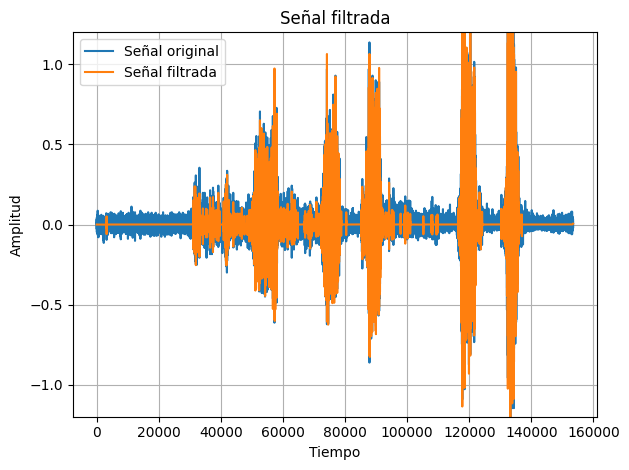

8.768603890532564

In [200]:
WLfiltered = WaveletFiltering(EMGsignal_NoDC, 0, len(EMGsignal_NoDC)+1)
snrWL = SNR(EMGsignal_NoDC, WLfiltered[0:-1])
snrWL

## IIR - Butterworth

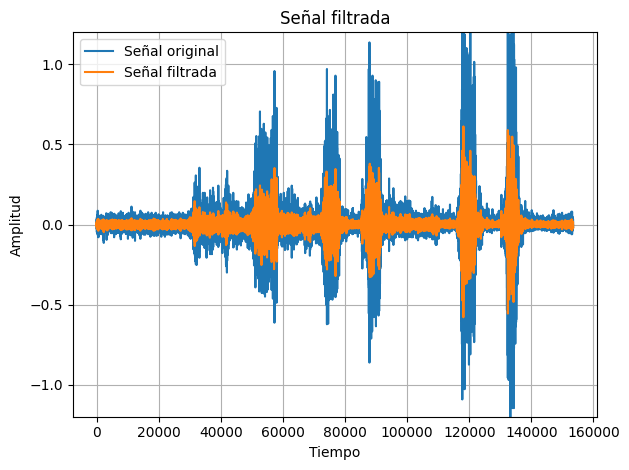

2.3529085512368138

In [201]:
BUTfiltered = IIR_Butter(EMGsignal_NoDC, 0, len(EMGsignal_NoDC)+1)
snrWL = SNR(EMGsignal_NoDC, BUTfiltered)
snrWL

## FIR

-2.4112711083937124

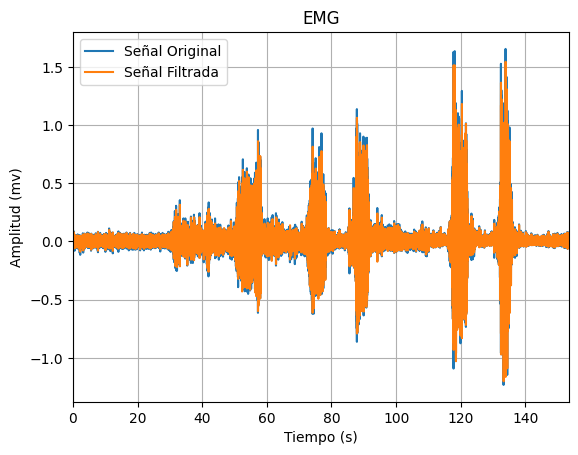

In [202]:
FIRfiltered = FIR(EMGsignal_NoDC, 0, len(EMGsignal_NoDC)+1)
snrWL = SNR(EMGsignal_NoDC, FIRfiltered)
snrWL

## FFT antes y después

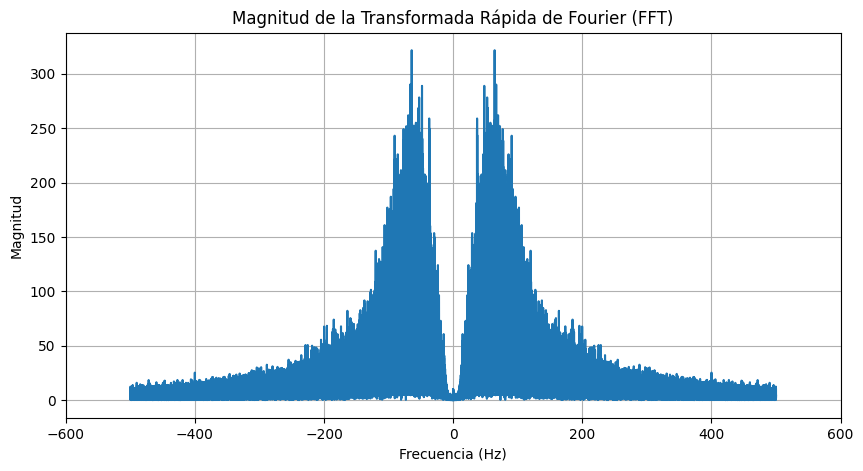

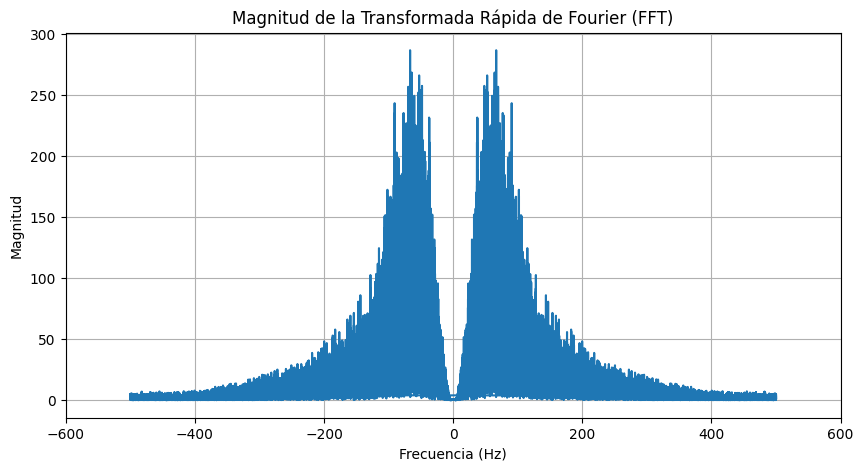

array([0.58081455+0.j        , 0.58080877+0.00204433j,
       0.58079144+0.00408857j, ..., 0.58076256-0.00613265j,
       0.58079144-0.00408857j, 0.58080877-0.00204433j])

In [227]:
FreqAnalysis_FFT(EMGsignal_NoDC)
FreqAnalysis_FFT(WLfiltered)

# SEGMENTACIÓN DE LA SEÑAL

In [211]:
signalSet = split_signal(WLfiltered, 200)
restSegments = signalSet[0:100]
excitementSegments = signalSet[200:350]

## Frecuencia

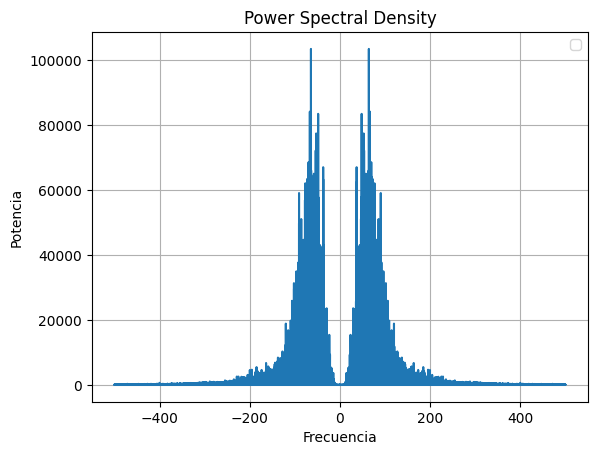

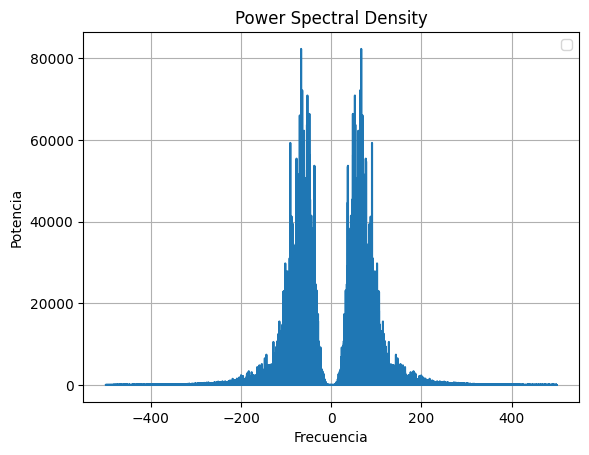

In [204]:
Periodogram(EMGsignal_NoDC)
Periodogram(WLfiltered)

# EXTRACCIÓN DE CARACTRÍSTICAS

In [254]:
timeChar(restSegments)
timeChar(excitementSegments)

Mean Absolute Value:  6.300666062906359e-05
Root Mean Square:  0.00015769969702353733
Mean Absolute Value Slope:  1.8174870896818233e-05
Variance:  2.0411350956583705e-06
iEMG: 7337.0151106503245
Waveform Length (WL): 153449
Zeros Crosses (ZC): 29410
Sign Signal Change (SSC): 72504
Mean Absolute Value:  0.03610156783141938
Root Mean Square:  0.04959301368485842
Mean Absolute Value Slope:  0.015983620202017625
Variance:  0.006265571934615343
iEMG: 7337.0151106503245
Waveform Length (WL): 153449
Zeros Crosses (ZC): 29410
Sign Signal Change (SSC): 72504


In [251]:
freqChar(restSegments)
freqChar(excitementSegments)

Peak Frequency:  1.0
Median Frequency:  0.0001848562877894764
Mean Frequency:  1.9076008102648512
Peak Frequency:  21.433333333333334
Median Frequency:  0.1231212760796462
Mean Frequency:  77.46537925956812
